In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame

X = housing[['MedInc']].values
y = housing['MedHouseVal'].values.reshape(-1, 1)



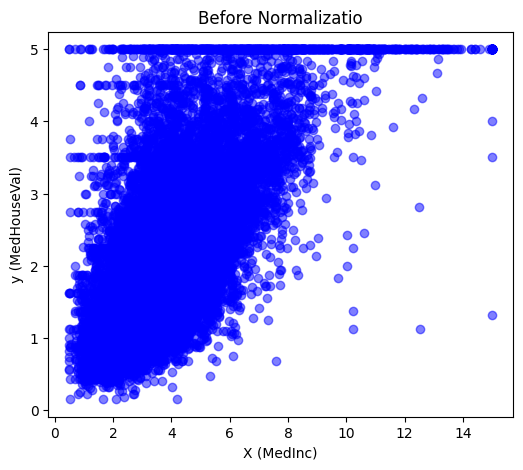

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Before Normalizatio")
plt.xlabel("X (MedInc)")
plt.ylabel("y (MedHouseVal)")
plt.show()

In [ ]:
X_min, X_max = np.min(X), np.max(X)
X = (X - X_min) / (X_max - X_min)  # Scaling to [0,1]

Y_min, Y_max = np.min(y), np.max(y)
y = (y - Y_min) / (Y_max - Y_min)  # Scaling to [0,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("Y shape:", y.shape)
print("y", y)
print("X", X)

X shape: (20640, 1)
Y shape: (20640, 1)
y [[0.90226638]
 [0.70824656]
 [0.69505074]
 ...
 [0.15938285]
 [0.14371281]
 [0.15340349]]
X [[0.53966842]
 [0.53802706]
 [0.46602805]
 ...
 [0.08276438]
 [0.09429525]
 [0.13025338]]


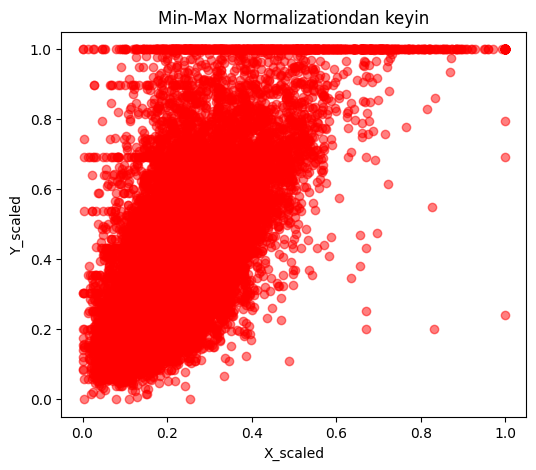

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='red', alpha=0.5)
plt.title("Min-Max Normalizationdan keyin")
plt.xlabel("X_scaled")
plt.ylabel("Y_scaled")
plt.show()

In [ ]:
# Assign initial values to parameters
b = 0.5   # Initial intercept
m_ = 0.5  # Initial slope

# Learning rate
alpha = 0.01

# Number of iterations
num_iterations = 10000

N = len(X_train)  # number of samples
# X_train, X_test, y_train, y_tes
for i in range(num_iterations):
    # y_fit = b + m_ * X_train  # Prediction
    y_fit = b + np.dot(X_train, m_)
    error = y_fit - y_train  # Error
    db = (1/N) * np.sum(error)  # ∂J/∂b
    dm = (1/N) * np.sum(error * X_train)  # ∂J/∂m
    b = b - alpha * db
    m_ = m_ - alpha * dm

    if i % 100 == 0:
        cost = (1/(2*N)) * np.sum(error**2)
        print(f"Iteration {i}: cost={cost:.2f}, b={b:.2f}, m={m_:.4f}")

Iteration 0: cost=0.04, b=0.50, m=0.4996
Iteration 100: cost=0.02, b=0.36, m=0.4811
Iteration 200: cost=0.02, b=0.31, m=0.4829
Iteration 300: cost=0.02, b=0.29, m=0.4917
Iteration 400: cost=0.02, b=0.29, m=0.5028
Iteration 500: cost=0.02, b=0.28, m=0.5145
Iteration 600: cost=0.02, b=0.28, m=0.5264
Iteration 700: cost=0.02, b=0.27, m=0.5381
Iteration 800: cost=0.02, b=0.27, m=0.5497
Iteration 900: cost=0.02, b=0.27, m=0.5611
Iteration 1000: cost=0.02, b=0.27, m=0.5723
Iteration 1100: cost=0.02, b=0.26, m=0.5834
Iteration 1200: cost=0.02, b=0.26, m=0.5942
Iteration 1300: cost=0.02, b=0.26, m=0.6049
Iteration 1400: cost=0.02, b=0.26, m=0.6155
Iteration 1500: cost=0.02, b=0.25, m=0.6258
Iteration 1600: cost=0.02, b=0.25, m=0.6360
Iteration 1700: cost=0.02, b=0.25, m=0.6460
Iteration 1800: cost=0.02, b=0.25, m=0.6558
Iteration 1900: cost=0.02, b=0.24, m=0.6655
Iteration 2000: cost=0.02, b=0.24, m=0.6751
Iteration 2100: cost=0.02, b=0.24, m=0.6845
Iteration 2200: cost=0.02, b=0.24, m=0.6937


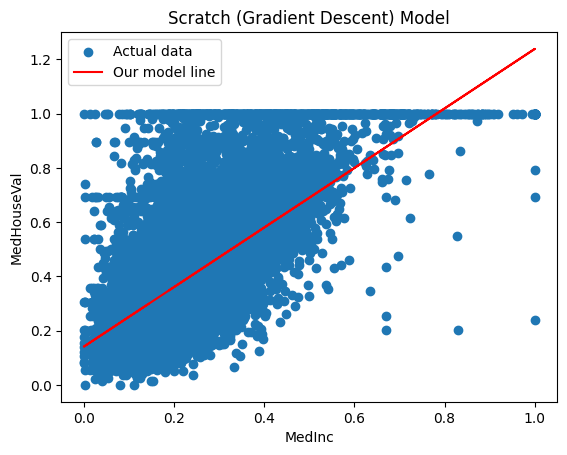

Final parameters (Scratch-GD):
b (intercept) = 0.14106969379601264
m (slope) = 1.0971683965237466
R2: 0.4695500726157613
Mean Squared Error (MSE): 0.030145097553897368
Mean Absolute Error (MAE): 0.13133156135852572


In [ ]:
# Result of our Scratch model
y_fit = b + m_ * X_train

plt.scatter(X_train, y_train, label='Actual data')
plt.plot(X_train, y_fit, label='Our model line', color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()

print("Final parameters (Scratch-GD):")
print("b (intercept) =", b)
print("m (slope) =", m_)

mse = mean_squared_error(y_train, y_fit)
mae = mean_absolute_error(y_train, y_fit)
r2_scores = r2_score(y_train, y_fit)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

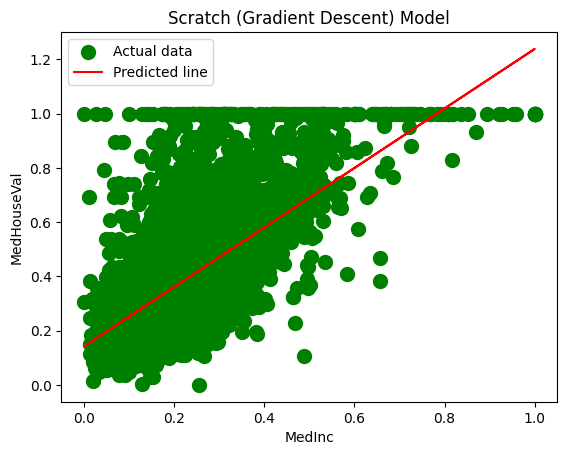

Future prediction: MedInc = [[0.08146784]
 [0.14009462]
 [0.2055282 ]
 ...
 [0.60205376]
 [0.15759093]
 [0.21049365]] -> MedHouseVal = [[0.23045364]
 [0.29477708]
 [0.36656874]
 ...
 [0.80162406]
 [0.31397348]
 [0.37201667]]


In [ ]:
# 5️⃣ Predicting for a new point
y_pred = b +np.dot(X_test, m_)  # Predicted price
plt.scatter(X_test, y_test, color='green', s=100, label='Actual data')
plt.plot(X_test, y_pred, label='Predicted line', color='red')

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()

print("Future prediction: MedInc =", X_test, "-> MedHouseVal =", y_pred)

In [ ]:
# new_y_original = scaler_Y.inverse_transform(new_y.reshape(-1, 1))
# new_y_sk_original = scaler_Y.inverse_transform(new_y_sk)

# # X ni asl qiymatlarga qaytarish
# X_original = X * (X_max - X_min) + X_min

y_pred_original = y_pred * (Y_max - Y_min) + Y_min

# y_test ni asl qiymatlarga qaytarish
y_test_original = y_test * (Y_max - Y_min) + Y_min

In [ ]:
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2_scores = r2_score(y_test_original, y_pred_original)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R2: 0.4534724368423675
Mean Squared Error (MSE): 0.716174625617882
Mean Absolute Error (MAE): 0.6401981689668487
